# Air Quality Time Series Forecasting Project

## Introduction
This project aims to analyze and build a predictive model for air quality using time series data from the UCI Air Quality dataset. Air quality is a crucial factor for human health and environmental monitoring. Accurate predictions of air pollutants like CO, NOx, and other gases can support better decision-making for air quality management and policy development.

## Objectives
1. **Data Exploration and Cleaning**: Understand and preprocess the dataset for time series analysis.
2. **Feature Engineering**: Create suitable features to enhance the predictive power of the model.
3. **Model Training and Evaluation**: Build and train a time series forecasting model to predict air quality levels.
4. **Result Analysis and Visualization**: Visualize and interpret the results for actionable insights.

**Dataset Source**: The dataset is sourced from the UCI Machine Learning Repository and contains measurements from an air quality monitoring station in Italy.

## Table of Contents
1. [Loading and Exploring Data](#loading-exploring-data)
2. [Data Cleaning and Preparation](#data-cleaning-preparation)
3. [Feature Engineering and Model Training](#feature-engineering-model-training)

## Loading and Exploring Data <a id="loading-exploring-data"></a>
The dataset is provided as a `.csv` file and contains measurements of air pollutants and meteorological variables. We will load the data using the `pandas` library, explore its structure, and check for any issues like missing values.

In [2]:
import pandas as pd
import numpy as np

# Path to the data file
file_path = '../data/AirQualityUCI.xlsx'  # Make sure the path is correct

# Load the data
data = pd.read_excel(file_path)  # Load Excel file

# Display the first few rows of the data
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

## Output Analysis: Step 1
The output displays the first few rows of the dataset. The columns include:
- `Date`, `Time`: Date and time of the observation.
- Air quality measurements like `CO(GT)`, `NMHC(GT)`, `C6H6(GT)`.
- Various other features such as temperature (`T`), relative humidity (`RH`), and absolute humidity (`AH`).

This step provides an overview of the dataset's structure and the types of data we'll be working with.

# Step 2: Combine Date and Time Columns
To make the dataset suitable for time series analysis, we'll combine the `Date` and `Time` columns into a single `datetime` column.

In [3]:
# Combine 'Date' and 'Time' columns into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

# Drop the original 'Date' and 'Time' columns
data.drop(columns=['Date', 'Time'], inplace=True)

# Display the first few rows with new datetime column
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


## Output Analysis: Step 2
The `datetime` column is created by combining the `Date` and `Time` columns. The original `Date` and `Time` columns are dropped to avoid redundancy.
This ensures that the model understands the data as a time series, and the datetime format is correct for further processing.

# Step 3: Handle Missing Values
The dataset may contain missing values represented by `-200`. We'll replace `-200` with `NaN` to handle them properly and check for missing data in each column.

In [4]:
# Replace -200 with NaN to handle missing values
data.replace(-200, np.nan, inplace=True)

# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
datetime            0
dtype: int64

## Output Analysis: Step 3
The output lists the number of missing values in each column. Some columns have significant missing values (e.g., `NMHC(GT)`), which we need to handle before proceeding with analysis or modeling.

# Step 4: Impute Missing Values
We will handle missing values by imputing them with the median of each column. This is because the median is robust to outliers and provides a stable estimate for missing data.

In [5]:
# Impute missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
datetime         0
dtype: int64

## Output Analysis: Step 4
The missing values in each column have been successfully imputed using the median. As a result, all columns now have `0` missing values. The data is now clean and ready for further feature engineering or analysis. This step ensures that our model does not encounter any issues due to missing data during training.

# Step 5: Feature Engineering for Time Series
We will extract additional time-based features from the `datetime` column. These features will help the model better understand the temporal aspects of the data and improve its performance.

In [6]:
# Extract time-based features from the datetime column
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['day_of_week'] = data['datetime'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the first few rows with new time-based features
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,day,month,day_of_week,is_weekend
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00,18,10,3,2,0
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00,19,10,3,2,0
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00,20,10,3,2,0
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00,21,10,3,2,0
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00,22,10,3,2,0


## Output Analysis: Step 5
The `datetime` column was successfully recreated by combining `Date` and `Time`. Additionally, new time-based features were extracted:

- `hour`: The hour of the observation.
- `day`: The day of the month.
- `month`: The month of the observation.
- `day_of_week`: The day of the week (0 = Monday, 6 = Sunday).
- `is_weekend`: A binary flag indicating whether the observation occurred on a weekend.

The first few rows confirm that these new features have been correctly added. These features will help the model better understand patterns and seasonality in the data.

# Step 6: Detecting and Handling Outliers
Outliers can significantly affect the model's performance, so it's crucial to detect and handle them effectively. We'll use the IQR (Interquartile Range) method to detect potential outliers and either remove or cap them.

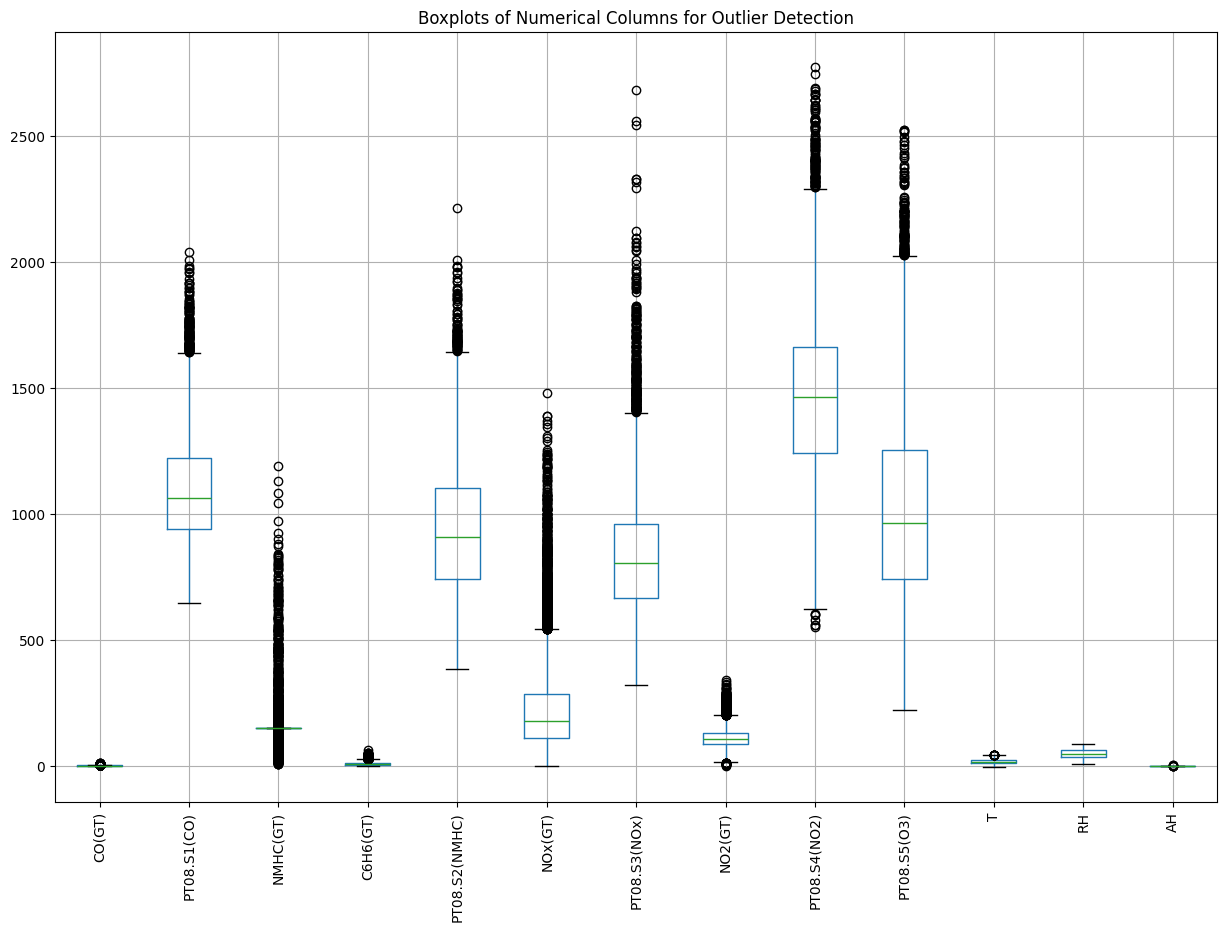

In [7]:
import matplotlib.pyplot as plt

# Plotting boxplots to visualize outliers in numerical columns
plt.figure(figsize=(15, 10))
data.drop(columns=['datetime', 'hour', 'day', 'month', 'day_of_week', 'is_weekend']).boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Columns for Outlier Detection')
plt.show()


In [8]:
# Calculating Q1, Q3, and IQR for each numerical column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Defining the boundaries for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out rows that contain outliers beyond the IQR boundaries
outliers_filtered_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Displaying the shape of the data before and after outlier removal
data_shape_before = data.shape
data_shape_after = outliers_filtered_data.shape

data_shape_before, data_shape_after

((9357, 19), (7173, 19))

## Output Analysis: Step 6
The output will show the shape of the data before and after removing outliers:
- **Before Outlier Removal**: Original number of rows and columns in the dataset.
- **After Outlier Removal**: Reduced number of rows after removing rows that contained extreme outliers.

This step ensures that the model is trained on clean data without extreme anomalies that could hinder its performance.

# Step 7: Verifying the Data Distribution After Outlier Handling
To confirm that the outliers have been effectively removed or capped, we'll plot the boxplots again for numerical columns. This helps us verify the improved data distribution.

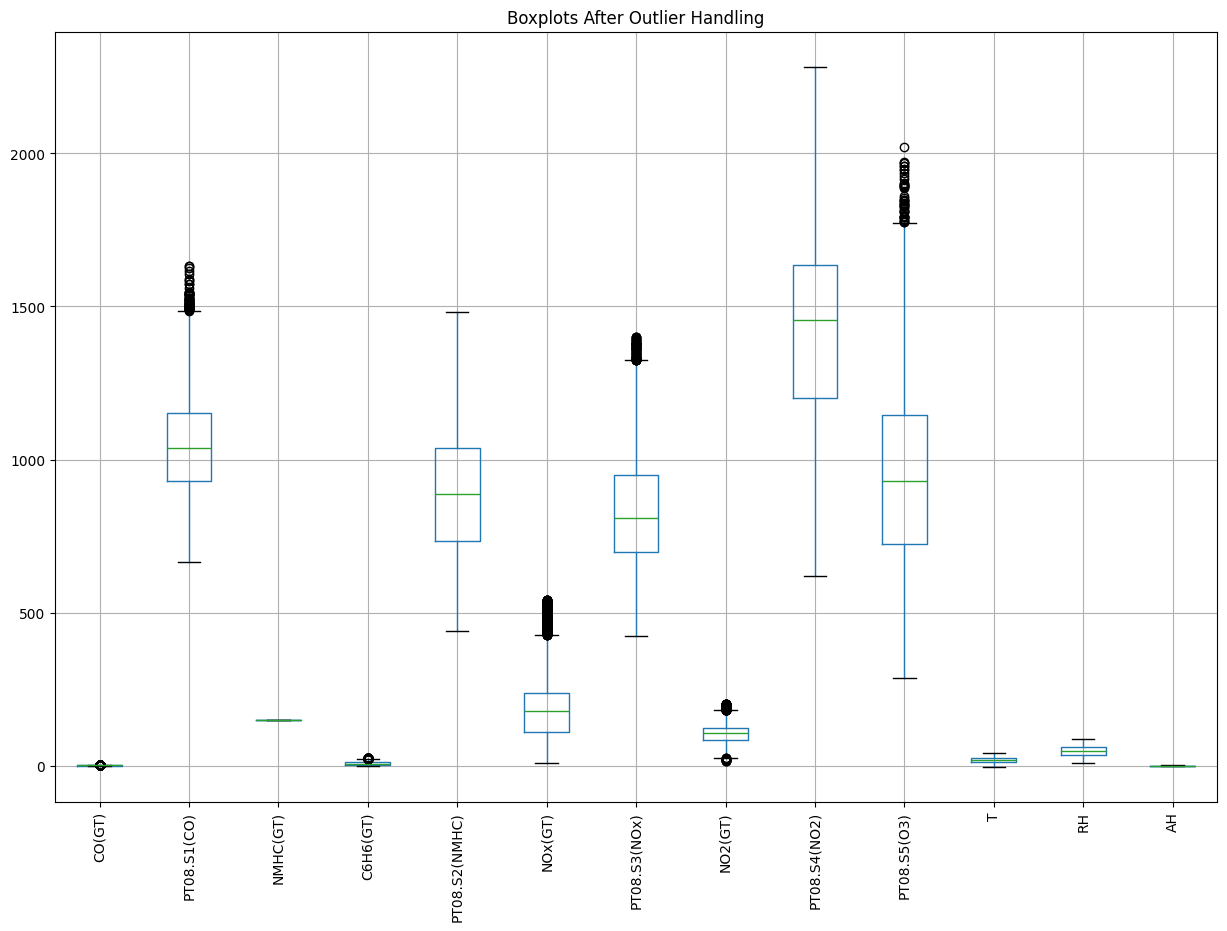

In [9]:
# Plotting boxplots to verify data distribution after handling outliers
plt.figure(figsize=(15, 10))
outliers_filtered_data.drop(columns=['datetime', 'hour', 'day', 'month', 'day_of_week', 'is_weekend']).boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots After Outlier Handling')
plt.show()

## Output Analysis: Step 7
The new boxplots display a more balanced data distribution, with a significant reduction in extreme values (outliers). The minor outliers that remain are less likely to adversely impact model training. The overall improvement in data quality will contribute to better model performance.

# Step 8: Feature Selection Based on Correlation
We will calculate the correlation of all features with the target variable (e.g., `CO(GT)`) to understand which features are most relevant for predicting the target.

In [10]:
# Calculate correlations with the target variable
target_variable = 'CO(GT)'
correlations = outliers_filtered_data.corr()[target_variable].sort_values(ascending=False)

# Display correlations
correlations

CO(GT)           1.000000
PT08.S2(NMHC)    0.759045
C6H6(GT)         0.757833
PT08.S1(CO)      0.694639
PT08.S5(O3)      0.682843
NOx(GT)          0.654886
NO2(GT)          0.567919
PT08.S4(NO2)     0.476746
hour             0.343705
T                0.132501
month            0.103744
AH               0.075473
day             -0.016126
datetime        -0.071766
RH              -0.074426
day_of_week     -0.101201
is_weekend      -0.152911
PT08.S3(NOx)    -0.633838
NMHC(GT)              NaN
Name: CO(GT), dtype: float64

## Output Analysis: Step 8
The output will show the correlation of each feature with the target variable (`CO(GT)`). Features with high correlation (either positive or negative) are potentially important for model training. Features with very low correlation might be less useful and could be removed.

## Step: Removing NaN Correlation Column

Since the column `NMHC(GT)` has a NaN value in its correlation with the target variable (`CO(GT)`), we will remove this column from the filtered dataset `outliers_filtered_data` to ensure that all features used for modeling are valid.

In [11]:
# Correct step: Removing the 'NMHC(GT)' column from the correct dataset
cleaned_data_corrected = outliers_filtered_data.drop(columns=['NMHC(GT)'])

# Display the structure of the dataset after removing the NaN column
cleaned_data_corrected.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,day,month,day_of_week,is_weekend
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00,18,10,3,2,0
23,2.9,1383.00,11.151581,1019.75,243.0,1008.00,135.0,1718.75,1104.00,9.775,67.624998,0.818501,2004-03-11 17:00:00,17,11,3,3,0
39,1.8,1544.50,22.074162,1353.00,179.8,767.25,109.0,2058.00,1587.75,9.225,56.199999,0.656065,2004-03-12 09:00:00,9,12,3,4,0
94,3.0,1457.75,11.867358,1045.00,170.0,973.75,129.0,1646.00,1098.50,22.225,28.400000,0.751627,2004-03-14 16:00:00,16,14,3,6,1
184,4.5,1616.50,21.312687,1332.50,349.0,685.75,150.0,2010.00,1818.50,17.850,40.525000,0.820964,2004-03-18 10:00:00,10,18,3,3,0


# Step 9: Selecting Important Features Based on Correlation
We'll select features with strong correlations to the target variable `CO(GT)` and drop less important features. This ensures the model focuses on the most informative variables.


In [12]:
# Calculate correlation matrix
correlation_matrix = cleaned_data_corrected.corr()

# Display correlations with the target variable 'CO(GT)'
target_variable = 'CO(GT)'
co_corr = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Set a threshold to select important features (e.g., correlation > 0.5)
threshold = 0.5
important_features = co_corr[co_corr > threshold].index.tolist()

# Filter the dataset to only include important features
data_filtered = cleaned_data_corrected[important_features]

# Display the structure of the filtered dataset with selected features
data_filtered.head()

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT)
0,2.6,1045.50,11.881723,1360.00,1267.50,166.0,1056.25,113.0
23,2.9,1019.75,11.151581,1383.00,1104.00,243.0,1008.00,135.0
39,1.8,1353.00,22.074162,1544.50,1587.75,179.8,767.25,109.0
94,3.0,1045.00,11.867358,1457.75,1098.50,170.0,973.75,129.0
184,4.5,1332.50,21.312687,1616.50,1818.50,349.0,685.75,150.0


In [13]:
# Extract time-based features from 'datetime' column
data_filtered['hour'] = cleaned_data_corrected['datetime'].dt.hour
data_filtered['day'] = cleaned_data_corrected['datetime'].dt.day
data_filtered.loc[:, 'month'] = cleaned_data_corrected['datetime'].dt.month
data_filtered.loc[:, 'day_of_week'] = cleaned_data_corrected['datetime'].dt.dayofweek
data_filtered.loc[:, 'is_weekend'] = data_filtered['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the structure of the dataset after the modification
data_filtered.head()

C:\Users\egeme\AppData\Local\Temp\ipykernel_28660\4009268488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['hour'] = cleaned_data_corrected['datetime'].dt.hour
C:\Users\egeme\AppData\Local\Temp\ipykernel_28660\4009268488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['day'] = cleaned_data_corrected['datetime'].dt.day
C:\Users\egeme\AppData\Local\Temp\ipykernel_28660\4009268488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT),hour,day,month,day_of_week,is_weekend
0,2.6,1045.50,11.881723,1360.00,1267.50,166.0,1056.25,113.0,18,10,3,2,0
23,2.9,1019.75,11.151581,1383.00,1104.00,243.0,1008.00,135.0,17,11,3,3,0
39,1.8,1353.00,22.074162,1544.50,1587.75,179.8,767.25,109.0,9,12,3,4,0
94,3.0,1045.00,11.867358,1457.75,1098.50,170.0,973.75,129.0,16,14,3,6,1
184,4.5,1332.50,21.312687,1616.50,1818.50,349.0,685.75,150.0,10,18,3,3,0


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select columns to scale (excluding the target variable and time-based features)
columns_to_scale = [col for col in data_filtered.columns if col not in [target_variable, 'datetime', 'hour', 'day', 'month', 'day_of_week', 'is_weekend']]

# Scale the features with .loc to avoid the SettingWithCopyWarning
data_filtered.loc[:, columns_to_scale] = scaler.fit_transform(data_filtered[columns_to_scale])

# Display the scaled data to verify
data_filtered.head()

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT),hour,day,month,day_of_week,is_weekend
0,2.6,0.714796,0.615331,1.889660,1.048492,-0.230858,1.174218,0.210131,18,10,3,2,0
23,2.9,0.592518,0.478662,2.030925,0.510156,0.449649,0.918771,0.845593,17,11,3,3,0
39,1.8,2.175007,2.523169,3.022845,2.102941,-0.108897,-0.355814,0.094593,9,12,3,4,0
94,3.0,0.712421,0.612643,2.490033,0.492046,-0.195507,0.737444,0.672286,16,14,3,6,1
184,4.5,2.077660,2.380635,3.465064,2.862703,1.386452,-0.787293,1.278863,10,18,3,3,0


In [15]:
# Create a deep copy to avoid SettingWithCopyWarning
data_filtered = cleaned_data_corrected[important_features].copy()

# Forward fill any missing values
data_filtered = data_filtered.ffill()

# Display dataset after handling missing values
data_filtered.head()

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT)
0,2.6,1045.50,11.881723,1360.00,1267.50,166.0,1056.25,113.0
23,2.9,1019.75,11.151581,1383.00,1104.00,243.0,1008.00,135.0
39,1.8,1353.00,22.074162,1544.50,1587.75,179.8,767.25,109.0
94,3.0,1045.00,11.867358,1457.75,1098.50,170.0,973.75,129.0
184,4.5,1332.50,21.312687,1616.50,1818.50,349.0,685.75,150.0


In [16]:
# Export the final processed dataset to a CSV file
final_data_copy = data_filtered.copy()  # Make a copy of the data

# Save to a CSV file
final_data_copy.to_csv('final_data.csv', index=False)

In [17]:
# Add the 'datetime' column back to the dataset if it was previously dropped or excluded
data_filtered['datetime'] = cleaned_data_corrected['datetime']

# Display the structure of the dataset with 'datetime' column added
data_filtered.head()

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT),datetime
0,2.6,1045.50,11.881723,1360.00,1267.50,166.0,1056.25,113.0,2004-03-10 18:00:00
23,2.9,1019.75,11.151581,1383.00,1104.00,243.0,1008.00,135.0,2004-03-11 17:00:00
39,1.8,1353.00,22.074162,1544.50,1587.75,179.8,767.25,109.0,2004-03-12 09:00:00
94,3.0,1045.00,11.867358,1457.75,1098.50,170.0,973.75,129.0,2004-03-14 16:00:00
184,4.5,1332.50,21.312687,1616.50,1818.50,349.0,685.75,150.0,2004-03-18 10:00:00


In [18]:
# Ensure 'datetime' column is in datetime format
data_filtered['datetime'] = pd.to_datetime(data_filtered['datetime'])

# Extract time-based features
data_filtered['hour'] = data_filtered['datetime'].dt.hour
data_filtered['day'] = data_filtered['datetime'].dt.day
data_filtered['month'] = data_filtered['datetime'].dt.month
data_filtered['day_of_week'] = data_filtered['datetime'].dt.dayofweek
data_filtered['is_weekend'] = data_filtered['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Apply cyclic encoding for the time-based features
# Hour
data_filtered['hour_sin'] = np.sin(2 * np.pi * data_filtered['hour'] / 24)
data_filtered['hour_cos'] = np.cos(2 * np.pi * data_filtered['hour'] / 24)

# Day of the month
data_filtered['day_sin'] = np.sin(2 * np.pi * data_filtered['day'] / 31)
data_filtered['day_cos'] = np.cos(2 * np.pi * data_filtered['day'] / 31)

# Month of the year
data_filtered['month_sin'] = np.sin(2 * np.pi * data_filtered['month'] / 12)
data_filtered['month_cos'] = np.cos(2 * np.pi * data_filtered['month'] / 12)

# Display the modified dataset
data_filtered.head()

,CO(GT),PT08.S2(NMHC),C6H6(GT),PT08.S1(CO),PT08.S5(O3),NOx(GT),PT08.S3(NOx),NO2(GT),datetime,hour,day,month,day_of_week,is_weekend,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2.6,1045.50,11.881723,1360.00,1267.50,166.0,1056.25,113.0,2004-03-10 18:00:00,18,10,3,2,0,-1.000000,-1.836970e-16,0.897805,-0.440394,1.0,6.123234e-17
23,2.9,1019.75,11.151581,1383.00,1104.00,243.0,1008.00,135.0,2004-03-11 17:00:00,17,11,3,3,0,-0.965926,-2.588190e-01,0.790776,-0.612106,1.0,6.123234e-17
39,1.8,1353.00,22.074162,1544.50,1587.75,179.8,767.25,109.0,2004-03-12 09:00:00,9,12,3,4,0,0.707107,-7.071068e-01,0.651372,-0.758758,1.0,6.123234e-17
94,3.0,1045.00,11.867358,1457.75,1098.50,170.0,973.75,129.0,2004-03-14 16:00:00,16,14,3,6,1,-0.866025,-5.000000e-01,0.299363,-0.954139,1.0,6.123234e-17
184,4.5,1332.50,21.312687,1616.50,1818.50,349.0,685.75,150.0,2004-03-18 10:00:00,10,18,3,3,0,0.500000,-8.660254e-01,-0.485302,-0.874347,1.0,6.123234e-17


In [19]:
# Export the final processed dataset to a CSV file
final_data_copy = data_filtered.copy()  # Make a copy of the data

# Save to a CSV file
final_data_copy.to_csv('final_data.csv', index=False)

In [20]:
# Sort the data by datetime to ensure chronological order
data_filtered.sort_values('datetime', inplace=True)

# Define the split index (80% train, 20% test)
train_size = int(len(data_filtered) * 0.8)

# Split into train and test sets
train_df = data_filtered[:train_size].copy()
test_df = data_filtered[train_size:].copy()

print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

Training set: (5738, 20)
Test set: (1435, 20)


In [21]:
# Convert 'datetime' to an integer index
train_df['time_idx'] = pd.to_numeric(train_df['datetime']).astype(int)
test_df['time_idx'] = pd.to_numeric(test_df['datetime']).astype(int)

In [22]:
# Replace '.' characters in column names with '_'
train_df.columns = [col.replace('.', '_') for col in train_df.columns]
test_df.columns = [col.replace('.', '_') for col in test_df.columns]

# Display updated column names to verify
print(train_df.columns)

Index(['CO(GT)', 'PT08_S2(NMHC)', 'C6H6(GT)', 'PT08_S1(CO)', 'PT08_S5(O3)',
       'NOx(GT)', 'PT08_S3(NOx)', 'NO2(GT)', 'datetime', 'hour', 'day',
       'month', 'day_of_week', 'is_weekend', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'time_idx'],
      dtype='object')


In [23]:
# Add a default 'group' column to indicate a single series
train_df['group'] = 'default'
test_df['group'] = 'default'

In [24]:
print(f"Total number of observations: {len(train_df)}")


Total number of observations: 5738


In [25]:
# Check the time distribution in your data
time_counts = train_df['time_idx'].value_counts().sort_index()
print(time_counts.describe())

# Check if there are any missing time steps
print("Number of unique time steps:", train_df['time_idx'].nunique())


count    5738.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64
Number of unique time steps: 5738


In [26]:
# Sort by datetime to ensure proper order
train_df.sort_values('datetime', inplace=True)

# Create a sequential time index based on row order
train_df['time_idx'] = range(len(train_df))

# Check the first few rows to ensure proper indexing
print(train_df[['datetime', 'time_idx']].head())

               datetime  time_idx
0   2004-03-10 18:00:00         0
23  2004-03-11 17:00:00         1
39  2004-03-12 09:00:00         2
94  2004-03-14 16:00:00         3
184 2004-03-18 10:00:00         4


In [27]:
# Save train_df as a CSV file
train_df.to_csv('train_df.csv', index=False)

# Save test_df as a CSV file
test_df.to_csv('test_df.csv', index=False)

print("Files saved as 'train_df.csv' and 'test_df.csv'")

Files saved as 'train_df.csv' and 'test_df.csv'


In [28]:
import torch
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
import pandas as pd


In [29]:
max_encoder_length = 30  # Length of the past sequences used for model input
max_prediction_length = 10  # Length of the prediction horizon

# Columns in your DataFrame
time_idx_col = "time_idx"  # Time index column
target_col = "CO(GT)"  # Target variable to be predicted
group_col = "group"  # Group column

# Specify the known and unknown variables
known_reals = [
    "time_idx", "hour", "day", "month", "day_of_week", "is_weekend",
    "hour_sin", "hour_cos", "day_sin", "day_cos", "month_sin", "month_cos"
]  # Replace with your known variables
unknown_reals = [target_col]  # The target variable is unknown during prediction

In [30]:
from pytorch_forecasting import TimeSeriesDataSet

# Create the TimeSeriesDataSet for training
training = TimeSeriesDataSet(
    train_df,
    time_idx=time_idx_col,
    target=target_col,
    group_ids=[group_col],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=known_reals,
    time_varying_unknown_reals=unknown_reals,
    allow_missing_timesteps=True  # Set to True based on your data structure
)

In [31]:
# Find the maximum time_idx in train_df
max_time_idx_train = train_df[time_idx_col].max()

# Adjust time_idx in test_df to be sequential from max_time_idx_train + 1
test_df[time_idx_col] = range(max_time_idx_train + 1, max_time_idx_train + 1 + len(test_df))

# Print to confirm changes
print(f"Adjusted time_idx in test_df: {test_df[time_idx_col].min()} to {test_df[time_idx_col].max()}")


Adjusted time_idx in test_df: 5738 to 7172


In [32]:
# Recreate the validation dataset from the corrected test_df
validation = TimeSeriesDataSet.from_dataset(
    training,
    test_df,
    min_prediction_idx=max_time_idx_train + 1  # Use the new start of time_idx in test_df
)

# Define a suitable batch size
batch_size = 64  # Adjust this value as needed based on your data and memory


# Create dataloaders again
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [33]:
import os
import torch
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, LightningModule
from pytorch_lightning.callbacks import EarlyStopping

# Temporal Fusion Transformer modelini başlatın
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Number of quantiles by default
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# LightningModule olarak TemporalFusionTransformer modelini sarmalayan sınıf
class TFTLightningModule(LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        # Eğitim adımını gerçekleştir
        x, y = batch
        # `model` içindeki `loss` hesaplamasını doğru şekilde ayarla
        out = self.model(x)
        y_pred = out[0]  # Modelin çıktısı tuple, `y_pred` ilk elemandır
        loss = self.model.loss(y_pred, y)
        # `batch_size` parametresini ekleyerek kaydedin
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def validation_step(self, batch, batch_idx):
        # Doğrulama adımını gerçekleştir
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # Modelin çıktısı tuple, `y_pred` ilk elemandır
        loss = self.model.loss(y_pred, y)
        # `batch_size` parametresini ekleyerek kaydedin
        self.log("val_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def configure_optimizers(self):
        # Adam optimizasyon algoritmasını kullanarak optimizer ayarla
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.model.hparams.learning_rate)
        return optimizer

# TemporalFusionTransformer modelini TFTLightningModule içerisine sar
tft_module = TFTLightningModule(tft)

# PyTorch Lightning Trainer'ı başlatın
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # GPU varsa kullan
    devices=1,  # Tek cihaz kullan
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, verbose=True)],  # Early stopping callback
    num_sanity_val_steps=0,  # Sanity check'i kapat
)

# Modeli eğitin
trainer.fit(
    tft_module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, from version 1.2.0, the default optimizer will be 'adam', in order to minimize the number of dependencies in default parameter settings. Users who wish to ensure their code continues using 'ranger' as optimizer sho

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.284


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.283


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.282


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.269


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.269. Signaling Trainer to stop.


In [34]:
torch.save(tft.state_dict(), "model_results/tft_final_model.pth")


In [35]:
# Model ağırlıklarını yükleyin
tft.load_state_dict(torch.load("model_results/tft_final_model.pth"))

# Modeli eval moduna geçirin (dropout gibi katmanların doğru çalışmasını sağlamak için)
tft.eval()

C:\Users\egeme\AppData\Local\Temp\ipykernel_28660\1963916747.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tft.load_state_dict(torch.load("tft_final_model.pth"))


TemporalFusionTransformer(
  	"attention_head_size":               1
  	"categorical_groups":                {}
  	"causal_attention":                  True
  	"dataset_parameters":                {'time_idx': 'time_idx', 'target': 'CO(GT)', 'group_ids': ['group'], 'weight': None, 'max_encoder_length': 30, 'min_encoder_length': 30, 'min_prediction_idx': 0, 'min_prediction_length': 10, 'max_prediction_length': 10, 'static_categoricals': [], 'static_reals': [], 'time_varying_known_categoricals': [], 'time_varying_known_reals': ['time_idx', 'hour', 'day', 'month', 'day_of_week', 'is_weekend', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'], 'time_varying_unknown_categoricals': [], 'time_varying_unknown_reals': ['CO(GT)'], 'variable_groups': {}, 'constant_fill_strategy': {}, 'allow_missing_timesteps': True, 'lags': {}, 'add_relative_time_idx': False, 'add_target_scales': False, 'add_encoder_length': False, 'target_normalizer': EncoderNormalizer(
  		method='standard

In [36]:
data['time_idx'] = range(len(data))

In [37]:
# Değiştirilecek sütun adları
data.columns = data.columns.str.replace('.', '_', regex=False)

# Şimdi veri setinizdeki sütun adları düzeltildi


In [38]:
print(training.group_ids)

['group']


In [39]:
data['group'] = 'group_1'

In [40]:
import numpy as np

# Sinüzoidal dönüşümleri ekleyin
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)


In [41]:
test_dataset = TimeSeriesDataSet.from_dataset(
    training,  # Eğitim veri kümesindeki ayarları kullanın
    data,      # Test verisi
    predict=True
)

# DataLoader'ı oluşturun
test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\data\timeseries.py:1188: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(


In [42]:
import os
import torch
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, LightningModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_optimizer import Ranger  # Import the Ranger optimizer

# Initialize the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    optimizer="ranger",  # Use Ranger optimizer
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Number of quantiles (default is 7)
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define a LightningModule that wraps the TemporalFusionTransformer model
class TFTLightningModule(LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        # Exclude 'model', 'loss', and 'logging_metrics' attributes from being saved in hyperparameters
        self.save_hyperparameters(ignore=["model", "loss", "logging_metrics"])

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        # Perform a single training step
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def validation_step(self, batch, batch_idx):
        # Perform a single validation step
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("val_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def test_step(self, batch, batch_idx):
        # Perform a single test step
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("test_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def configure_optimizers(self):
        # Set optimizer to use Ranger algorithm
        optimizer = Ranger(self.model.parameters(), lr=self.model.hparams.learning_rate)
        return optimizer

# Wrap the TemporalFusionTransformer model into the LightningModule
tft_module = TFTLightningModule(tft)

# Initialize PyTorch Lightning Trainer
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,  # Use a single device
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, verbose=True)],  # Early stopping callback
    num_sanity_val_steps=0,  # Disable sanity check
    deterministic=True,  # Ensure deterministic behavior for reproducibility
)

# Increase the `num_workers` parameter in DataLoaders for faster data loading
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4, persistent_workers=True)
val_dataloader = validation.to_dataloader(train=False, batch_size=64, num_workers=4, persistent_workers=True)

# Train the model
trainer.fit(
    tft_module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)

# Save the trained model
torch.save(tft.state_dict(), "model_results/tft_final_model.pth")

# To load the model for testing (if tested in a separate code block)
# tft.load_state_dict(torch.load("tft_final_model.pth"))

# Prepare test dataset and DataLoader
test_dataset = TimeSeriesDataSet.from_dataset(
    training,  # Use the settings from training dataset
    data,      # Your test dataset (should be processed similar to training)
    predict=True
)

# Create test DataLoader
test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)

# Test the model on test data
test_results = trainer.test(tft_module, dataloaders=test_dataloader)
print(test_results)


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 31.3 K | train
------------------------------------------------------------
31.3 K    Trainable params
0         Non-trainable param

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.307


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.303


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.291


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.291. Signaling Trainer to stop.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\data\timeseries.py:1188: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.5176875591278076
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 1.5176875591278076}]


In [43]:
# Get raw predictions and inputs from the model on the test set
raw_predictions = tft.predict(test_dataloader, mode="raw", return_x=True)

C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


In [44]:
print(type(raw_predictions))
print(len(raw_predictions))
print(raw_predictions)

<class 'pytorch_forecasting.models.base_model.Prediction'>
5
Prediction(output=Output(prediction=tensor([[[0.0000, 0.1374, 0.3576, 0.4574, 0.6602, 0.9395, 1.1225],
         [0.0000, 0.1525, 0.3647, 0.4648, 0.6677, 0.9311, 1.1010],
         [0.0000, 0.1669, 0.3640, 0.4837, 0.7021, 0.9443, 1.1277],
         [0.0000, 0.1874, 0.3717, 0.5219, 0.7689, 1.0005, 1.2086],
         [0.0000, 0.2346, 0.4109, 0.5980, 0.8802, 1.1157, 1.3592],
         [0.0000, 0.3450, 0.5185, 0.7442, 1.0577, 1.3085, 1.6022],
         [0.1343, 0.5240, 0.7177, 0.9746, 1.3116, 1.6022, 2.0085],
         [0.2273, 0.6151, 0.8388, 1.1359, 1.4963, 1.8958, 2.4862],
         [0.3077, 0.6577, 0.8826, 1.1590, 1.5024, 1.9351, 2.5600],
         [0.3919, 0.6944, 0.8996, 1.1309, 1.4269, 1.8256, 2.3855]]]), encoder_attention=tensor([[[[2.7535e-01, 1.0983e-04, 5.9979e-05, 8.9504e-04, 2.3084e-05,
           7.4718e-05, 2.0679e-04, 1.2519e-04, 6.5267e-05, 1.1340e-04,
           7.6952e-06, 7.9478e-06, 1.3767e-05, 1.6616e-05, 1.6253e-04,

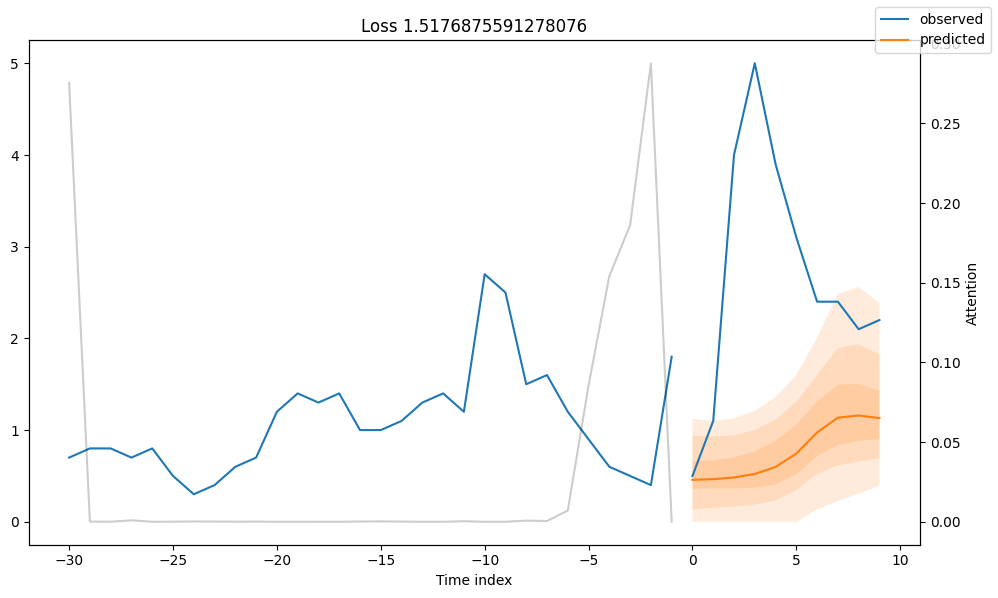

In [45]:
import matplotlib.pyplot as plt

# Extract 'output' and 'x' from the 'raw_predictions'
out = raw_predictions.output
x = raw_predictions.x

# Visualize predictions for the single available sample in the test set
fig, ax = plt.subplots(figsize=(10, 6))
tft.plot_prediction(x=x, out=out, idx=0, add_loss_to_title=True, ax=ax)
plt.show()


In [46]:
import pandas as pd

# Get predictions as a DataFrame
predictions = tft.predict(test_dataloader, mode="prediction")

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions.numpy())
print(predictions_df.head())

          0        1         2         3         4         5         6  \
0  0.457417  0.46482  0.483711  0.521876  0.598042  0.744242  0.974631   

          7         8         9  
0  1.135941  1.158952  1.130933  


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


In [47]:
# Create test DataLoader with more workers
test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64, num_workers=4, persistent_workers=True)

In [48]:
import pandas as pd
import torch
from pytorch_forecasting.data import TimeSeriesDataSet

# 1. Create test DataLoader with optimized parameters for fast processing
test_dataloader = test_dataset.to_dataloader(
    train=False,
    batch_size=64,
    num_workers=4,  # Set the number of workers for faster data loading
    persistent_workers=True  # Keep workers active to speed up processing
)

# 2. Get predictions from the model on the test data
predictions = tft.predict(test_dataloader, mode="prediction")

# 3. Convert predictions to a DataFrame for better visualization
predictions_df = pd.DataFrame(predictions.numpy())
print(predictions_df.head())  # Display first few rows of predictions

# Optional: Save predictions to CSV for future analysis
predictions_df.to_csv("predictions.csv", index=False)

# If you want to perform visualization or further analysis on the predictions
# (e.g., using matplotlib), you can do so here.


          0        1         2         3         4         5         6  \
0  0.457417  0.46482  0.483711  0.521876  0.598042  0.744242  0.974631   

          7         8         9  
0  1.135941  1.158952  1.130933  


In [49]:
import pandas as pd
import torch

# Extract actual values from test_dataloader correctly
actuals = []

for batch in iter(test_dataloader):
    # Assuming the target values are the second item in the batch
    targets = batch[1]  # Extract target tensor
    # If targets is a tuple, take the first tensor
    if isinstance(targets, tuple):
        targets = targets[0]
    actuals.append(targets)

# Concatenate all target tensors and convert to numpy
actuals = torch.cat(actuals).numpy()

# Create a DataFrame for actual values for better visualization
actuals_df = pd.DataFrame(actuals)

# Calculate error (Mean Absolute Error)
mae = (predictions_df - actuals_df).abs().mean().mean()
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Save predictions and actuals to a CSV file for further analysis
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]
combined_df.to_csv("predictions_vs_actuals.csv", index=False)

# Display first few rows of predictions vs actuals
print(combined_df.head())


Mean Absolute Error (MAE): 1.9029
   prediction_0  prediction_1  prediction_2  prediction_3  prediction_4  \
0      0.457417       0.46482      0.483711      0.521876      0.598042   

   prediction_5  prediction_6  prediction_7  prediction_8  prediction_9  \
0      0.744242      0.974631      1.135941      1.158952      1.130933   

   actual_0  actual_1  actual_2  actual_3  actual_4  actual_5  actual_6  \
0       0.5       1.1       4.0       5.0       3.9       3.1       2.4   

   actual_7  actual_8  actual_9  
0       2.4       2.1       2.2  


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 31.3 K | train
------------------------------------------------------------
31.3 K    Trainable params
0         Non-trainable param

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.304


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.292


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 0.276


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.276. Signaling Trainer to stop.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\data\timeseries.py:1188: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.0608454942703247
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 1.0608454942703247}]


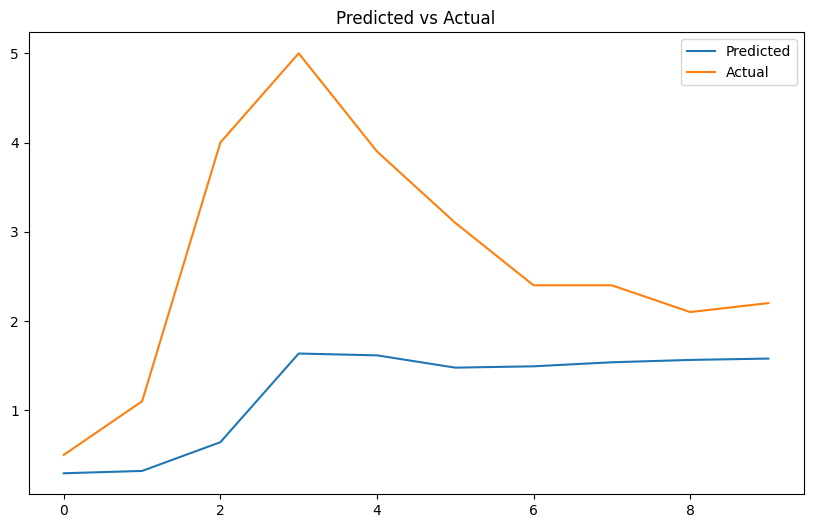

Mean Absolute Error (MAE): 1.4548


In [50]:
import os
import torch
import matplotlib.pyplot as plt
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, LightningModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_optimizer import Ranger  # Import the Ranger optimizer
from pytorch_forecasting.data import TimeSeriesDataSet
import pandas as pd
import numpy as np

# Initialize the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    optimizer="ranger",  # Use Ranger optimizer
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Number of quantiles (default is 7)
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define a LightningModule that wraps the TemporalFusionTransformer model
class TFTLightningModule(LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.save_hyperparameters(ignore=["model", "loss", "logging_metrics"])

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("val_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("test_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def configure_optimizers(self):
        optimizer = Ranger(self.model.parameters(), lr=self.model.hparams.learning_rate)
        return optimizer

# Wrap the TemporalFusionTransformer model into the LightningModule
tft_module = TFTLightningModule(tft)

# Initialize PyTorch Lightning Trainer
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,  # Use a single device
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, verbose=True)],  # Early stopping callback
    num_sanity_val_steps=0,  # Disable sanity check
    deterministic=True,  # Ensure deterministic behavior for reproducibility
)

# Increase the `num_workers` parameter in DataLoaders for faster data loading
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4, persistent_workers=True)
val_dataloader = validation.to_dataloader(train=False, batch_size=64, num_workers=4, persistent_workers=True)

# Train the model
trainer.fit(
    tft_module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)

# Save the trained model
torch.save(tft.state_dict(), "model_results/tft_final_model.pth")

# Prepare test dataset and DataLoader
test_dataset = TimeSeriesDataSet.from_dataset(
    training,  
    data,      
    predict=True
)


test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)


test_results = trainer.test(tft_module, dataloaders=test_dataloader)
print(test_results)



raw_predictions = tft.predict(test_dataloader, mode="raw")  


predictions = tft.predict(test_dataloader, mode="prediction")
predictions_df = pd.DataFrame(predictions.numpy())


actuals = []
for batch in iter(test_dataloader):
    targets = batch[1][0]  
    actuals.append(targets)

actuals = torch.cat(actuals).numpy()
actuals_df = pd.DataFrame(actuals)


plt.figure(figsize=(10, 6))
plt.plot(predictions_df.iloc[0], label="Predicted")
plt.plot(actuals_df.iloc[0], label="Actual")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()


combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]
combined_df.to_csv("predictions_vs_actuals.csv", index=False)


mae = (predictions_df - actuals_df).abs().mean().mean()
print(f"Mean Absolute Error (MAE): {mae:.4f}")



C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 31.3 K | train
------------------------------------------------------------
31.3 K    Trainable params
0         Non-trainable param

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.311


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.305


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.290


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.282


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.282


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.282. Signaling Trainer to stop.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\data\timeseries.py:1188: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.2164952754974365
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 1.2164952754974365}]


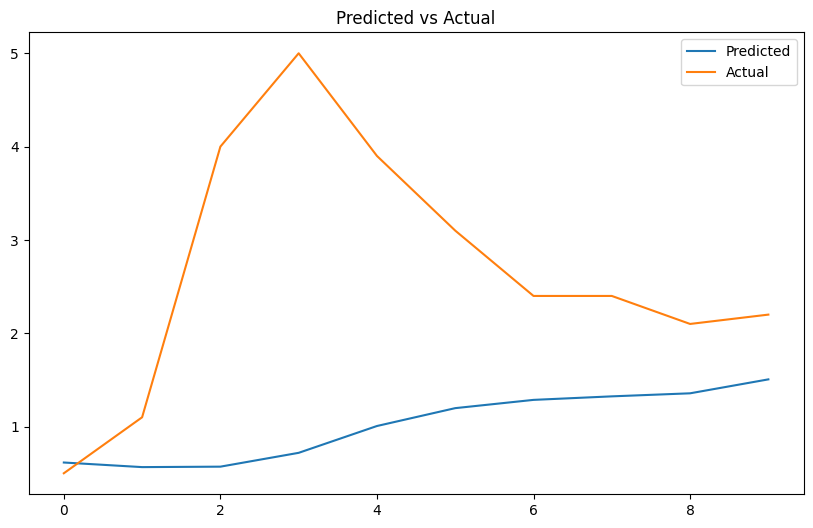

Mean Absolute Error (MAE): 1.6781
Mean Squared Error (MSE): 4.5805
Root Mean Squared Error (RMSE): 2.1402


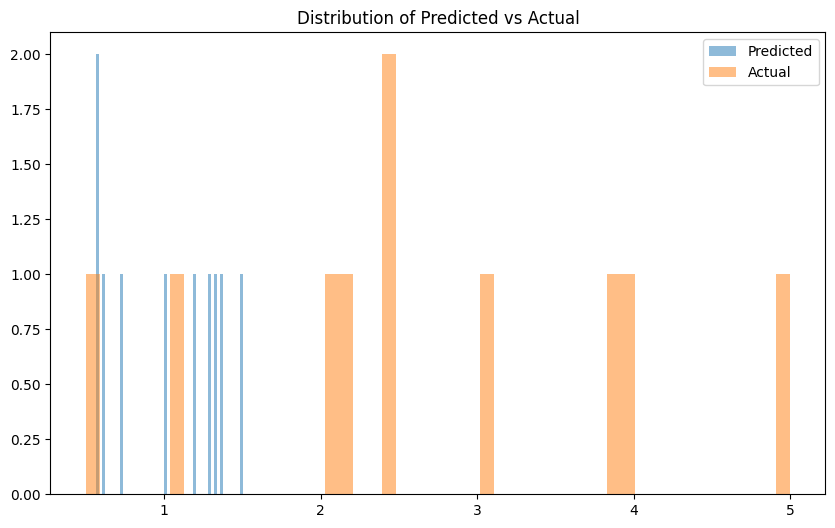

In [51]:
import os
import torch
import matplotlib.pyplot as plt
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, LightningModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_optimizer import Ranger  # Import the Ranger optimizer
from pytorch_forecasting.data import TimeSeriesDataSet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Initialize the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    optimizer="ranger",  # Use Ranger optimizer
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Number of quantiles (default is 7)
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define a LightningModule that wraps the Temporal Fusion Transformer model
class TFTLightningModule(LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.save_hyperparameters(ignore=["model", "loss", "logging_metrics"])

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("val_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("test_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def configure_optimizers(self):
        optimizer = Ranger(self.model.parameters(), lr=self.model.hparams.learning_rate)
        return optimizer

# Wrap the Temporal Fusion Transformer model into the LightningModule
tft_module = TFTLightningModule(tft)

# Initialize PyTorch Lightning Trainer
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,  # Use a single device
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, verbose=True)],  # Early stopping callback
    num_sanity_val_steps=0,  # Disable sanity check
    deterministic=True,  # Ensure deterministic behavior for reproducibility
)

# Increase the `num_workers` parameter in DataLoaders for faster data loading
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4, persistent_workers=True)
val_dataloader = validation.to_dataloader(train=False, batch_size=64, num_workers=4, persistent_workers=True)

# Train the model
trainer.fit(
    tft_module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)

# Save the trained model
torch.save(tft.state_dict(), "model_results/tft_final_model.pth")

# Prepare test dataset and DataLoader
test_dataset = TimeSeriesDataSet.from_dataset(
    training,  
    data,      
    predict=True
)

test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)

# Test the model on test data
test_results = trainer.test(tft_module, dataloaders=test_dataloader)
print(test_results)

# 1. Get Raw Predictions
raw_predictions = tft.predict(test_dataloader, mode="raw")  

# 2. Get Final Predictions
predictions = tft.predict(test_dataloader, mode="prediction")
predictions_df = pd.DataFrame(predictions.numpy())

# 3. Get Actual Values
actuals = []
for batch in iter(test_dataloader):
    targets = batch[1][0]  
    actuals.append(targets)

actuals = torch.cat(actuals).numpy()
actuals_df = pd.DataFrame(actuals)

# 4. Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.iloc[0], label="Predicted")
plt.plot(actuals_df.iloc[0], label="Actual")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

# 5. Save Predictions and Actuals to CSV
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]
combined_df.to_csv("predictions_vs_actuals.csv", index=False)

# 6. Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mae = (predictions_df - actuals_df).abs().mean().mean()
mse = mean_squared_error(actuals_df, predictions_df)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 7. Plot Distribution of Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.hist(predictions_df.values.flatten(), bins=50, alpha=0.5, label="Predicted")
plt.hist(actuals_df.values.flatten(), bins=50, alpha=0.5, label="Actual")
plt.title("Distribution of Predicted vs Actual")
plt.legend()
plt.show()


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 31.3 K | train
------------------------------------------------------------
31.3 K    Trainable params
0         Non-trainable param

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.308


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.299


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.285


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.275


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.275. Signaling Trainer to stop.
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_forecasting\data\timeseries.py:1188: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(
C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.6754381656646729
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 0.6754381656646729}]


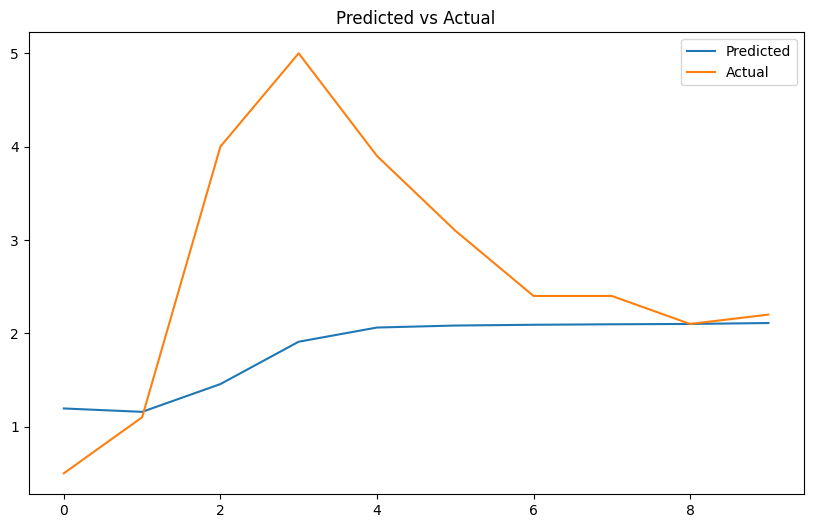

Mean Absolute Error (MAE): 0.9946
Mean Squared Error (MSE): 2.1120
Root Mean Squared Error (RMSE): 1.4533
R2 Score: nan


C:\Users\egeme\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [60]:
import os
import torch
import matplotlib.pyplot as plt
from pytorch_forecasting.models import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, LightningModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_optimizer import Ranger  # Import the Ranger optimizer
from pytorch_forecasting.data import TimeSeriesDataSet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import json

# Set random seed for reproducibility
def set_random_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

set_random_seed(42)

# Initialize the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    optimizer="ranger",  # Use Ranger optimizer
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Number of quantiles (default is 7)
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define a LightningModule that wraps the Temporal Fusion Transformer model
class TFTLightningModule(LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.save_hyperparameters(ignore=["model", "loss", "logging_metrics"])

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("val_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        y_pred = out[0]  # The model output is a tuple, 'y_pred' is the first element
        loss = self.model.loss(y_pred, y)
        self.log("test_loss", loss, prog_bar=True, batch_size=x['encoder_target'].shape[0])
        return loss

    def configure_optimizers(self):
        optimizer = Ranger(self.model.parameters(), lr=self.model.hparams.learning_rate)
        return optimizer

# Wrap the Temporal Fusion Transformer model into the LightningModule
tft_module = TFTLightningModule(tft)

# Initialize PyTorch Lightning Trainer
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    devices=1,  # Use a single device
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, verbose=True)],  # Early stopping callback
    num_sanity_val_steps=0,  # Disable sanity check
    deterministic=True,  # Ensure deterministic behavior for reproducibility
)

# Increase the `num_workers` parameter in DataLoaders for faster data loading
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4, persistent_workers=True)
val_dataloader = validation.to_dataloader(train=False, batch_size=64, num_workers=4, persistent_workers=True)

# Train the model
trainer.fit(
    tft_module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)

# Save the trained model
torch.save(tft.state_dict(), "model_results/tft_final_model.pth")

# Prepare test dataset and DataLoader
test_dataset = TimeSeriesDataSet.from_dataset(
    training,  
    data,      
    predict=True
)

test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)

# Test the model on test data
test_results = trainer.test(tft_module, dataloaders=test_dataloader)
print(test_results)

# 1. Get Raw Predictions
raw_predictions = tft.predict(test_dataloader, mode="raw")  

# 2. Get Final Predictions
predictions = tft.predict(test_dataloader, mode="prediction")
predictions_df = pd.DataFrame(predictions.numpy())

# 3. Get Actual Values
actuals = []
for batch in iter(test_dataloader):
    targets = batch[1][0]  
    actuals.append(targets)

actuals = torch.cat(actuals).numpy()
actuals_df = pd.DataFrame(actuals)

# 4. Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.iloc[0], label="Predicted")
plt.plot(actuals_df.iloc[0], label="Actual")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

# 5. Save Predictions and Actuals to CSV
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]
combined_df.to_csv("predictions_vs_actuals.csv", index=False)

# 6. Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score
mae = (predictions_df - actuals_df).abs().mean().mean()
mse = mean_squared_error(actuals_df, predictions_df)
rmse = np.sqrt(mse)
r2 = r2_score(actuals_df, predictions_df)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Convert the values to float for JSON serialization
results = {
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse),
    "R2": float(r2),
    "test_loss": float(test_results[0]['test_loss'])
}

# 7. Save Detailed Results to JSON
with open("model_results/model_results.json", "w") as f:
    json.dump(results, f, indent=4)


In [61]:
import os
import pandas as pd
import json

# Create a directory to save the results if it doesn't exist
if not os.path.exists("model_results"):
    os.makedirs("model_results")

# Save predictions and actuals to a CSV file
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]
combined_df.to_csv("model_results/predictions_vs_actuals.csv", index=False)
print("Predictions and actual values saved to 'model_results/predictions_vs_actuals.csv'.")

# Save evaluation metrics to a JSON file
results = {
    "Mean Absolute Error (MAE)": float(mae),
    "Mean Squared Error (MSE)": float(mse),
    "Root Mean Squared Error (RMSE)": float(rmse),
    "R2 Score": float(r2),
    "Test Loss": float(test_results[0]['test_loss'])
}

with open("model_results/evaluation_metrics.json", "w") as f:
    json.dump(results, f, indent=4)

print("Evaluation metrics saved to 'model_results/evaluation_metrics.json'.")


Predictions and actual values saved to 'model_results/predictions_vs_actuals.csv'.
Evaluation metrics saved to 'model_results/evaluation_metrics.json'.


Predicted vs Actual graph saved to 'model_results/predicted_vs_actual.png'.


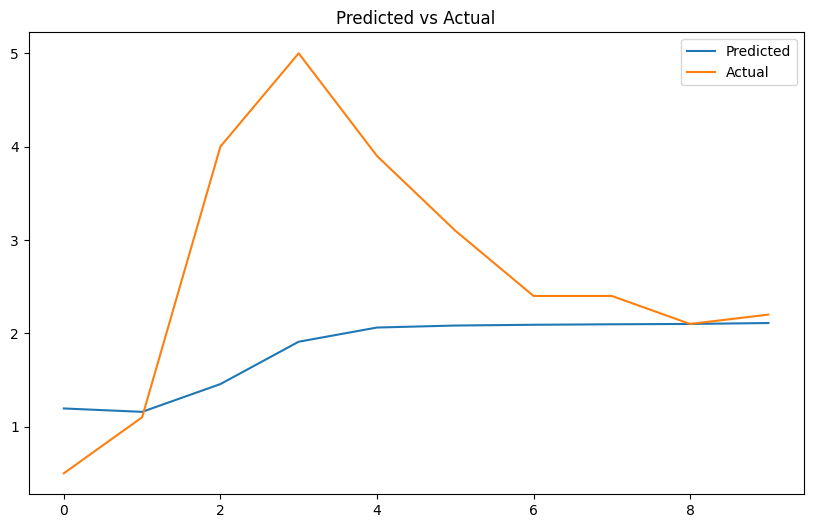

Residuals histogram saved to 'model_results/residuals_histogram.png'.


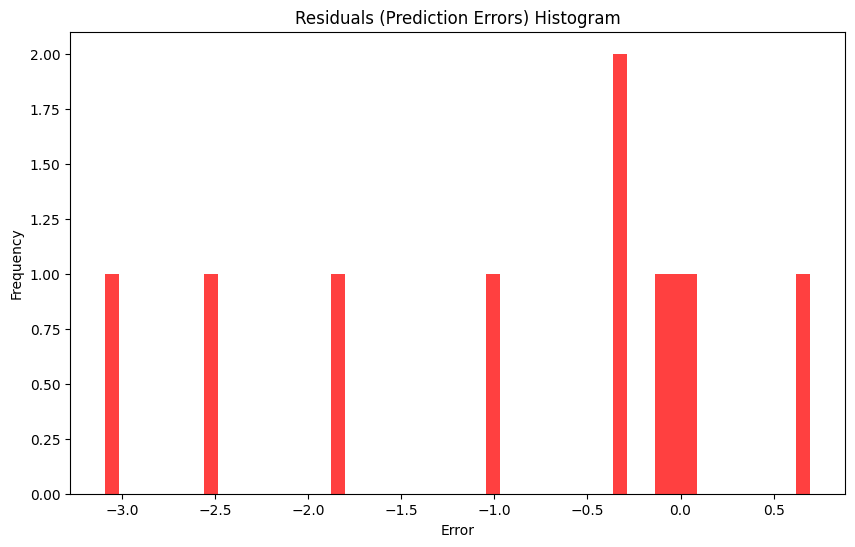

Scatter plot saved to 'model_results/scatter_predictions_vs_actuals.png'.


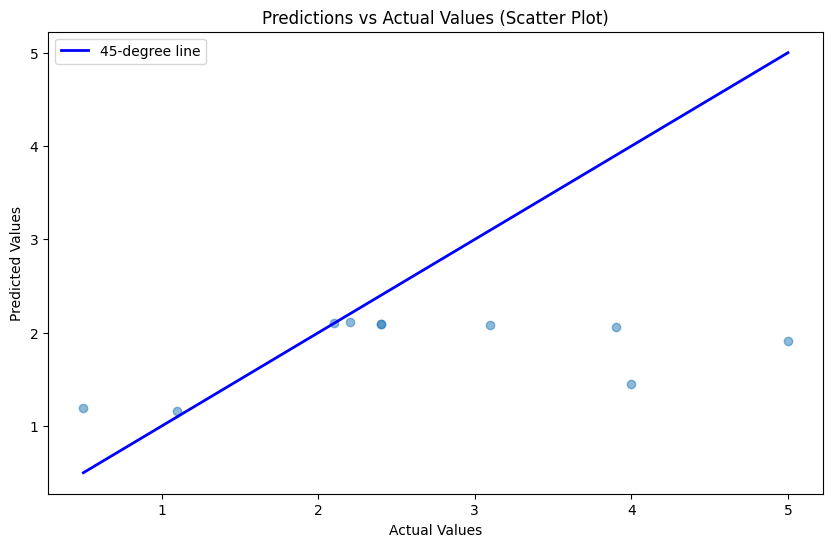

In [62]:
import matplotlib.pyplot as plt

# Plot and save the Predicted vs Actual values graph
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.iloc[0], label="Predicted")
plt.plot(actuals_df.iloc[0], label="Actual")
plt.title("Predicted vs Actual")
plt.legend()
plt.savefig("model_results/predicted_vs_actual.png")  # Save the plot as PNG
print("Predicted vs Actual graph saved to 'model_results/predicted_vs_actual.png'.")
plt.show()

# Calculate residuals (errors) between predictions and actuals
residuals = predictions_df - actuals_df

# Plot and save the residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals.values.flatten(), bins=50, alpha=0.75, color='red')
plt.title("Residuals (Prediction Errors) Histogram")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.savefig("model_results/residuals_histogram.png")  # Save the plot as PNG
print("Residuals histogram saved to 'model_results/residuals_histogram.png'.")
plt.show()

# Scatter plot of predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(actuals_df.values.flatten(), predictions_df.values.flatten(), alpha=0.5)
plt.plot([actuals_df.min().min(), actuals_df.max().max()], [actuals_df.min().min(), actuals_df.max().max()], color='blue', lw=2, label="45-degree line")
plt.title("Predictions vs Actual Values (Scatter Plot)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.savefig("model_results/scatter_predictions_vs_actuals.png")  # Save the plot as PNG
print("Scatter plot saved to 'model_results/scatter_predictions_vs_actuals.png'.")
plt.show()


In [63]:
# Statistical summary of the residuals (errors)
residuals_summary = residuals.describe()
print("Residuals Summary:")
print(residuals_summary)

# Save residuals summary to a CSV file
residuals_summary.to_csv("model_results/residuals_summary.csv")
print("Residuals summary saved to 'model_results/residuals_summary.csv'.")


Residuals Summary:
              0         1         2         3         4         5         6  \
count  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
mean   0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   
std         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
min    0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   
25%    0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   
50%    0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   
75%    0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   
max    0.694374  0.058168 -2.544361 -3.090503 -1.838473 -1.016926 -0.308909   

              7         8         9  
count  1.000000  1.000000  1.000000  
mean  -0.303628  0.000006 -0.090257  
std         NaN       NaN       NaN  
min   -0.303628  0.000006 -0.090257  
25%   -0.303628  0.000006 -0.090257  
50%   -0.303628  0.000006 -0.090257  
75%

In [64]:
# Print the first few rows of predicted and actual values
print("Predicted values:")
print(predictions_df.head())

print("\nActual values:")
print(actuals_df.head())

Predicted values:
          0         1         2         3         4         5         6  \
0  1.194374  1.158168  1.455639  1.909497  2.061527  2.083074  2.091091   

          7         8         9  
0  2.096372  2.100006  2.109743  

Actual values:
     0    1    2    3    4    5    6    7    8    9
0  0.5  1.1  4.0  5.0  3.9  3.1  2.4  2.4  2.1  2.2


In [65]:
# Combine predictions and actuals for a side-by-side comparison
combined_df = pd.concat([predictions_df, actuals_df], axis=1)
combined_df.columns = [f"prediction_{i}" for i in range(predictions_df.shape[1])] + [f"actual_{i}" for i in range(actuals_df.shape[1])]

# Save to CSV for easy viewing
combined_df.to_csv("predictions_vs_actuals_full.csv", index=False)

print("Predictions and actual values saved to 'predictions_vs_actuals_full.csv'.")

Predictions and actual values saved to 'predictions_vs_actuals_full.csv'.


In [66]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(actuals_df.values.flatten(), predictions_df.values.flatten())

# Print the R² score
print(f"R² Score: {r2:.4f}")


R² Score: -0.2601
